This notebook reproduces the plots contained in [D. Herb, M. Rossini, J. Ankerhold, PRE 109, 064413 (2024)](https://doi.org/10.1103/PhysRevE.109.064413)

In [2]:
import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('QuantumDNA')]+ 'QuantumDNA'
os.chdir(ROOT_DIR)

In [3]:
# change this to True if you want to save the figures you create in this notebook 
save = False
if save:
    SAVE_DIR = os.path.join(ROOT_DIR, 'docs', 'figures', 'my_figures')
    os.makedirs(SAVE_DIR, exist_ok=True)

In [4]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Paper

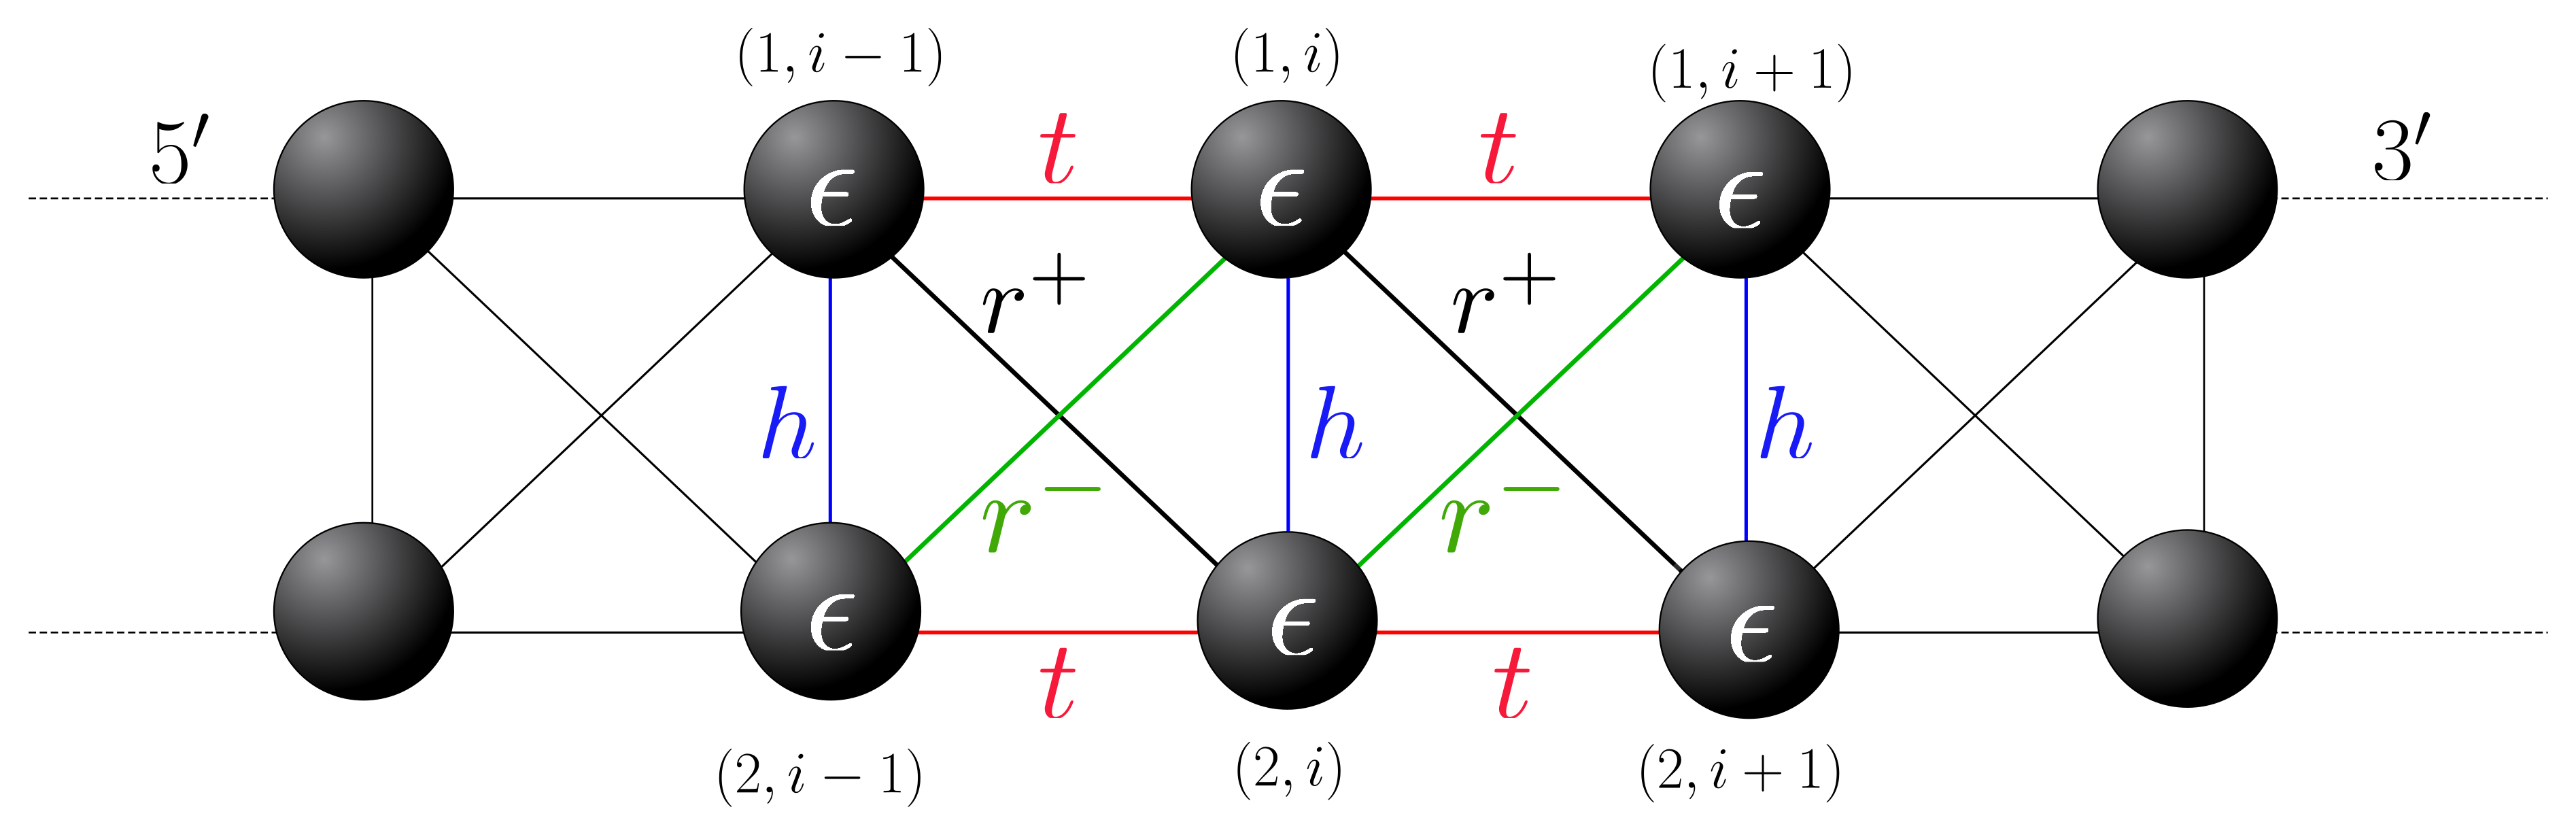

In [5]:
from IPython.display import Image
Image(filename=os.path.join(ROOT_DIR, 'docs', 'figures', 'paper_figures','Fig_1.png'), width=1000)

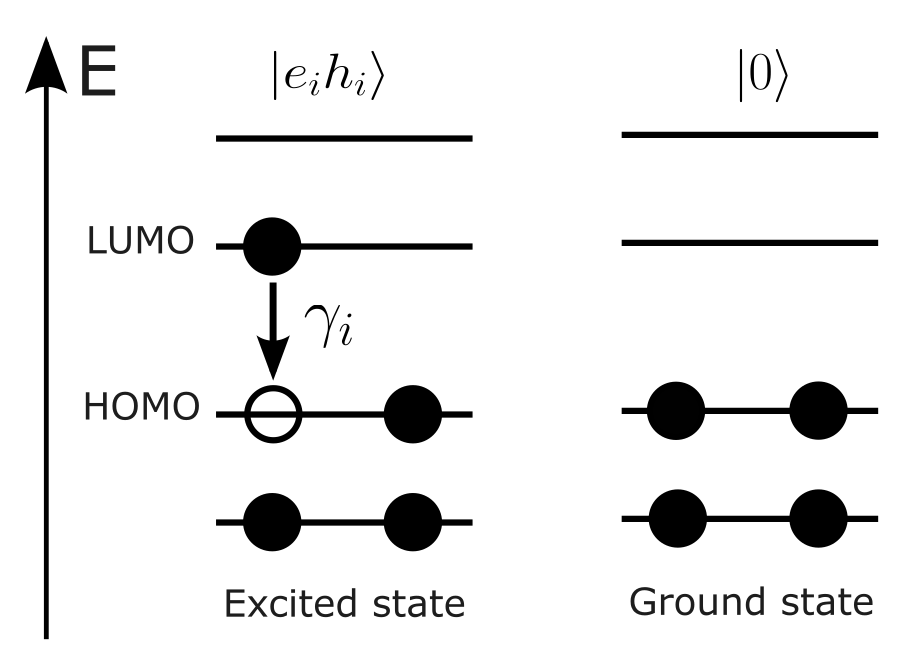

In [6]:
from IPython.display import Image
Image(filename=os.path.join(ROOT_DIR, 'docs', 'figures', 'paper_figures','Fig_2.png'), width=600)

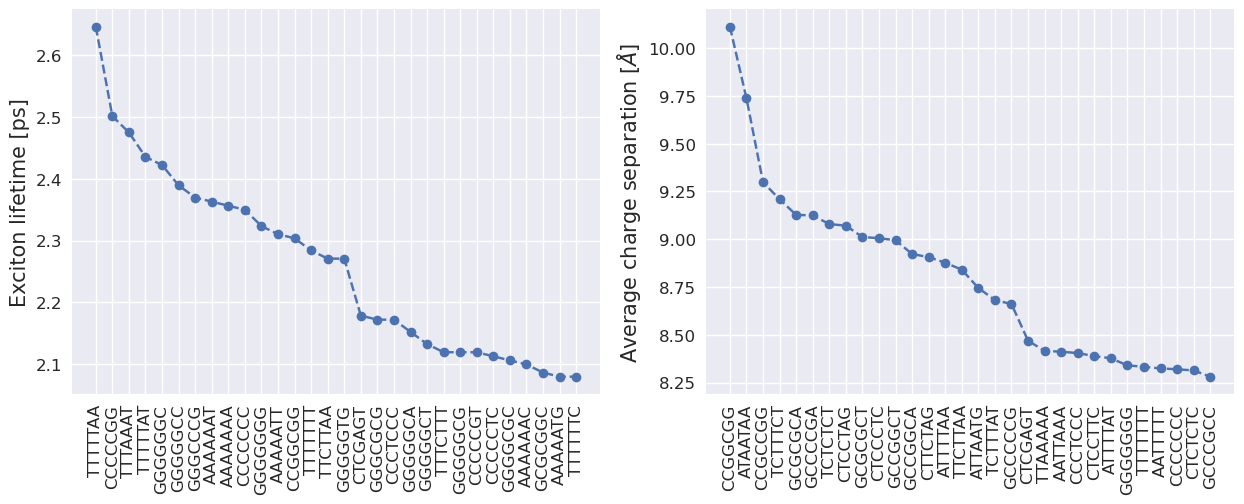

In [8]:
import numpy as np
from tools import save_fig, sorted_dict
from qDNA import my_load, plot_dna_base_frequency

# parameters
dipole_dict = my_load('dipole_7bp_J0', directory = 'docs/data/')
lifetime_dict = my_load('lifetime_7bp_J0', directory = 'docs/data/') 
# the lifetimes are usually given in femtoseconds   
top_num = 30

dna_seqs_lifetime = list(lifetime_dict.keys())[:top_num]
lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000
dna_seqs_dipole = list(dipole_dict.keys())[:top_num]
dipoles = list(dipole_dict.values())[:top_num]

# plotting
fig, ax = plt.subplots(1, 2, figsize= (15,5) )

ax[0].plot(dna_seqs_lifetime, lifetimes, 'o--')
ax[0].set_ylabel(r'Exciton lifetime [ps]')
ax[0].set_xticks(dna_seqs_lifetime)
ax[0].set_xticklabels(labels = dna_seqs_lifetime, rotation=90)

ax[1].plot(dna_seqs_dipole, dipoles, 'o--')
ax[1].set_ylabel(r'Average charge separation [$\AA$]') 
ax[1].set_xticks(dna_seqs_dipole)
ax[1].set_xticklabels(labels = dna_seqs_dipole, rotation=90)

if save:
    save_fig(fig, 'Fig_3', SAVE_DIR)
plt.show()

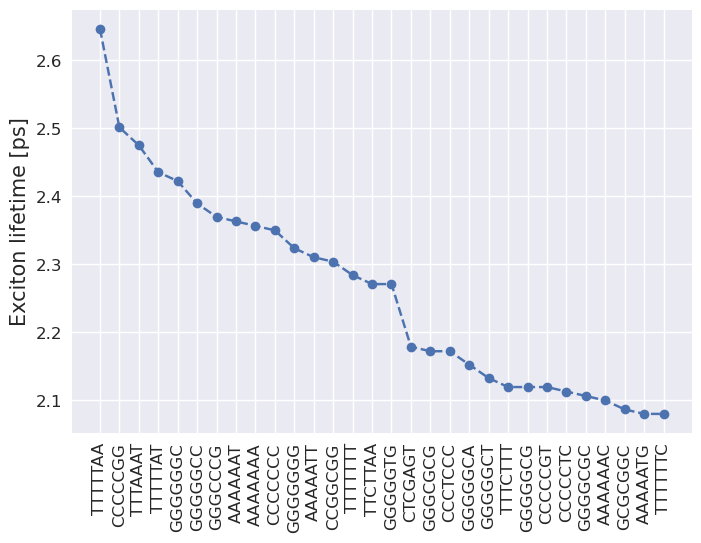

In [9]:
import numpy as np
from tools import save_fig, sorted_dict
from qDNA import my_load, plot_dna_base_frequency

# parameters
lifetime_dict = sorted_dict( my_load('lifetime_7bp_J0', directory = 'docs/data/') )
top_num = 30

dna_seqs = list(lifetime_dict.keys())[:top_num]
lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000

# plotting
fig, ax = plt.subplots()
ax.plot(dna_seqs, lifetimes, 'o--')
ax.set_ylabel(r'Exciton lifetime [ps]')
ax.set_xticks(dna_seqs)
ax.set_xticklabels(labels = dna_seqs, rotation=90)

if save:
    save_fig(fig, 'Fig_3a', SAVE_DIR, format='pdf')

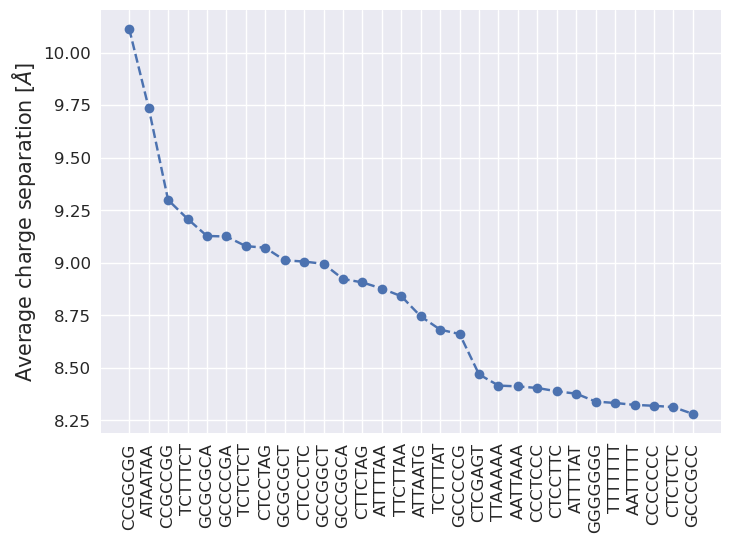

In [10]:
import numpy as np

from tools import save_fig, sorted_dict
from qDNA import my_load, plot_dna_base_frequency

# parameters
dipole_dict = sorted_dict( my_load('dipole_7bp_J0', directory = 'docs/data/') )
top_num = 30

dna_seqs = list(dipole_dict.keys())[:top_num]
dipoles = list(dipole_dict.values())[:top_num]

# plotting
fig, ax = plt.subplots()
ax.plot(dna_seqs, dipoles, 'o--')
ax.set_ylabel(r'Average charge separation [$\AA$]') 
ax.set_xticks(dna_seqs)
ax.set_xticklabels(labels = dna_seqs, rotation=90)

if save:
    save_fig(fig, 'Fig_3b', SAVE_DIR, format='pdf')

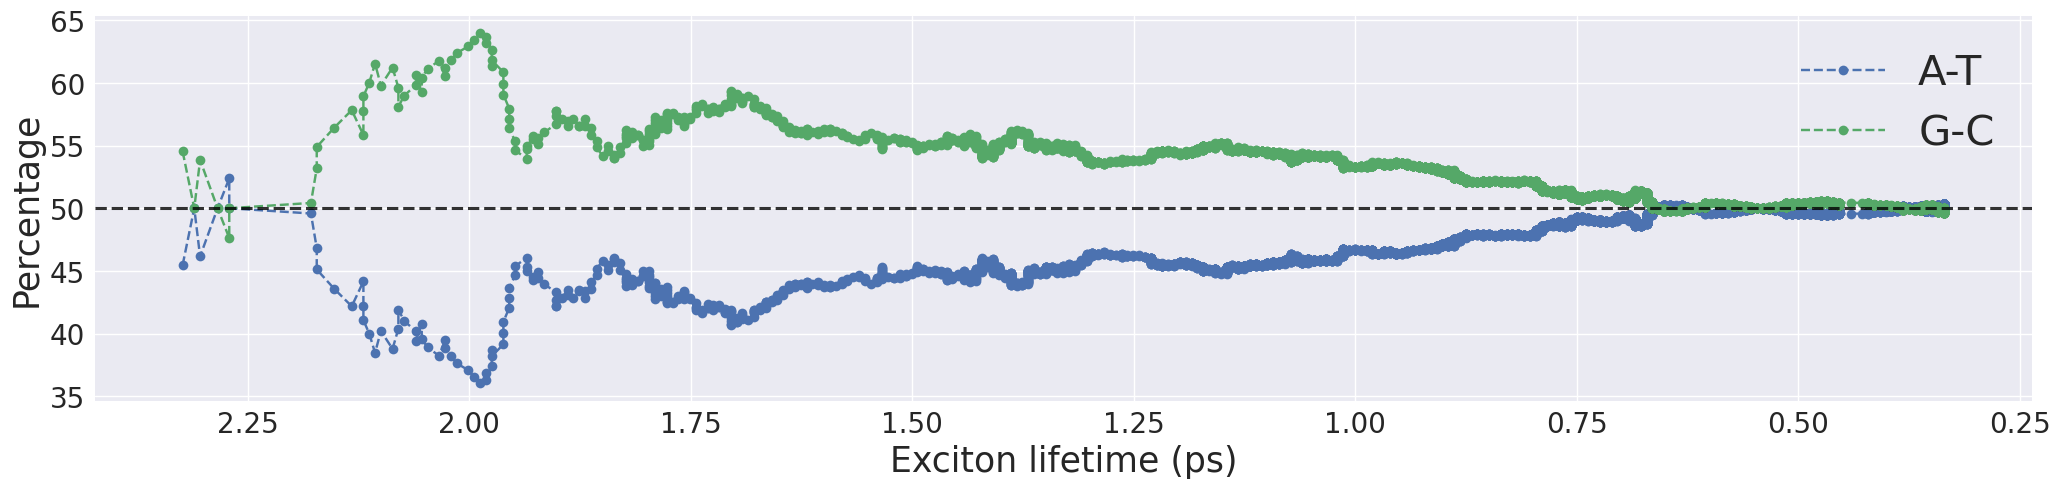

In [11]:
from tools import save_fig
from qDNA import my_load, plot_dna_base_frequency

# dipole_dict = my_load('dipole_7bp_J0', directory = 'docs/data/')
lifetime_dict = my_load('lifetime_7bp_J0', directory = 'docs/data/')

# plotting
plot_dna_base_frequency(lifetime_dict)

if save:
    save_fig(fig, 'Fig_4', SAVE_DIR, format='pdf')

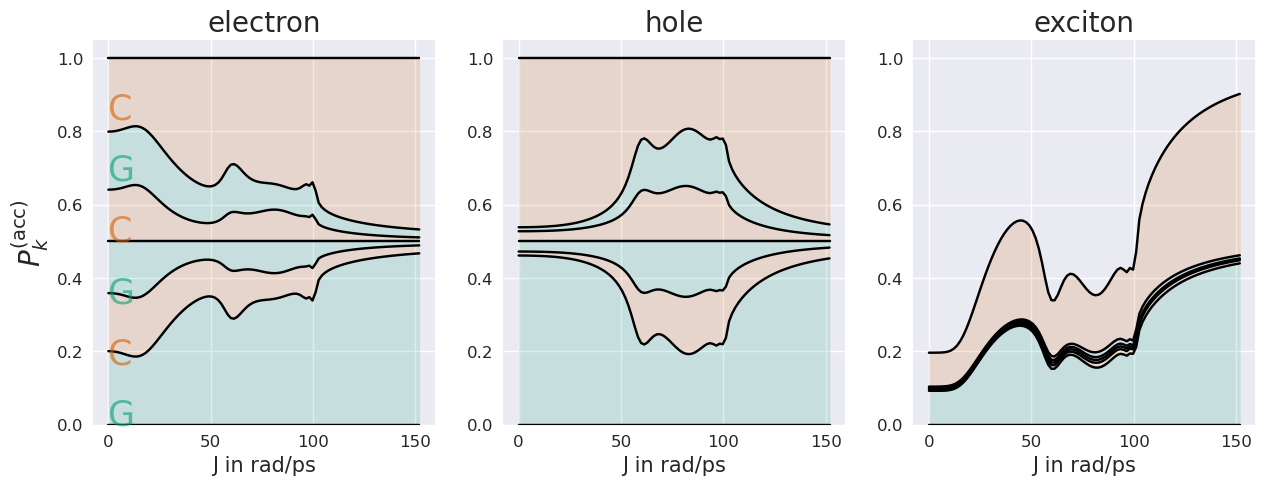

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from tools import save_fig
from qDNA import DNA_Seq, TB_Ham, plot_average_pop

# parameters
kwargs = dict(source = 'Simserides2014')
upper_strand, tb_model_name= 'GCGCGC', 'WM'
J_list, J_unit = np.linspace(0, 100, 100), 'meV'

dna_seq = DNA_Seq(upper_strand, tb_model_name)
tb_ham = TB_Ham(dna_seq, **kwargs)

# plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_average_pop(ax, tb_ham, J_list, J_unit)

if save:
    save_fig(fig, 'Fig_5a', SAVE_DIR, format='pdf')

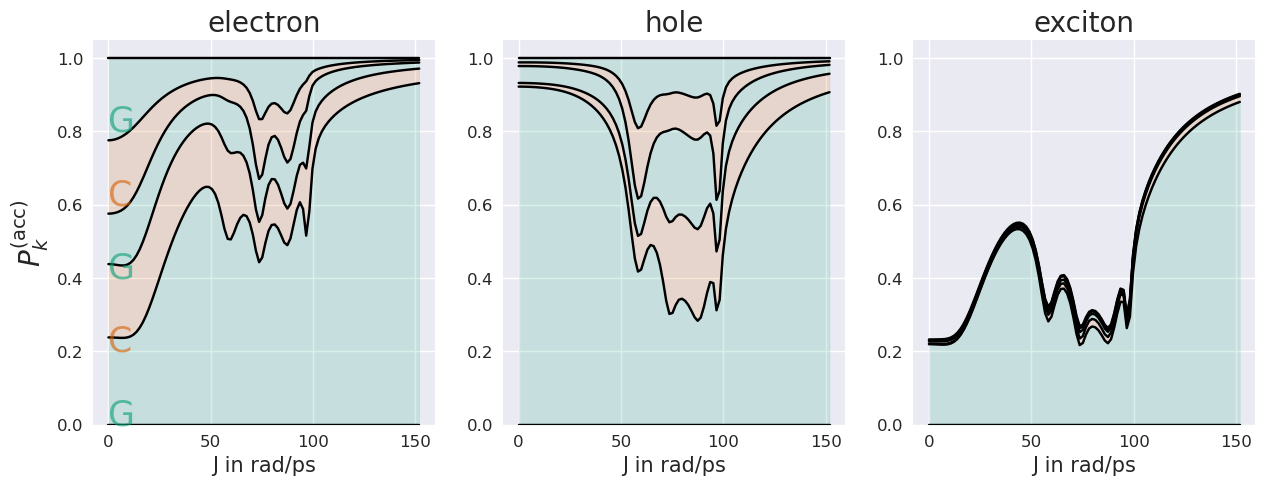

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from tools import save_fig
from qDNA import DNA_Seq, TB_Ham, plot_average_pop

# parameters
kwargs = dict(source = 'Simserides2014')
upper_strand, tb_model_name= 'GCGCG', 'WM'
J_list, J_unit = np.linspace(0, 100, 100), 'meV'

dna_seq = DNA_Seq(upper_strand, tb_model_name)
tb_ham = TB_Ham(dna_seq, **kwargs)

# plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_average_pop(ax, tb_ham, J_list, J_unit)

if save: 
    save_fig(fig, 'Fig_5b', SAVE_DIR, format='pdf')

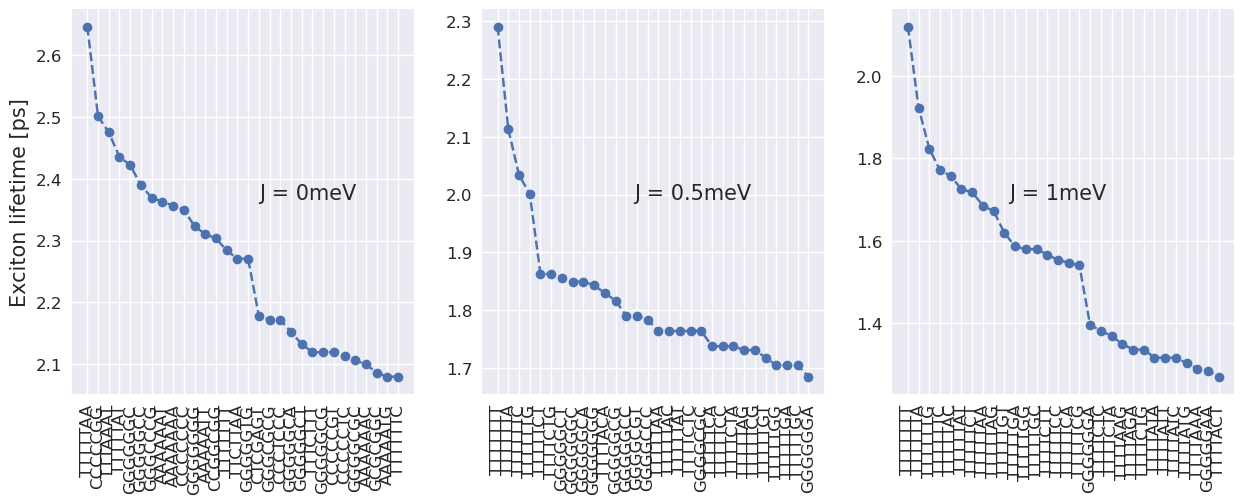

In [14]:
from tools import my_load, save_fig

# parameters
top_num = 30

# plotting
fig, ax = plt.subplots(1, 3, figsize= (15,5) )

for i, J in enumerate([0,0.5,1]):
    lifetime_dict = my_load(f'lifetime_7bp_J{J}', directory = 'docs/data/') 
    dna_seqs_lifetime = list(lifetime_dict.keys())[:top_num]
    lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000

    ax[i].plot(dna_seqs_lifetime, lifetimes, 'o--')
    ax[i].set_xticks(dna_seqs_lifetime)
    ax[i].set_xticklabels(labels = dna_seqs_lifetime, rotation=90)
    fig.text(0.25*(i+1),0.5, f'J = {J}meV', fontsize=15)

ax[0].set_ylabel(r'Exciton lifetime [ps]')

if save:
    save_fig(fig, 'Fig_6', SAVE_DIR, format='pdf')

C:\Users\Dennis Herb\anaconda3\envs\qDNA\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Dennis Herb\anaconda3\envs\qDNA\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Dennis Herb\anaconda3\envs\qDNA\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


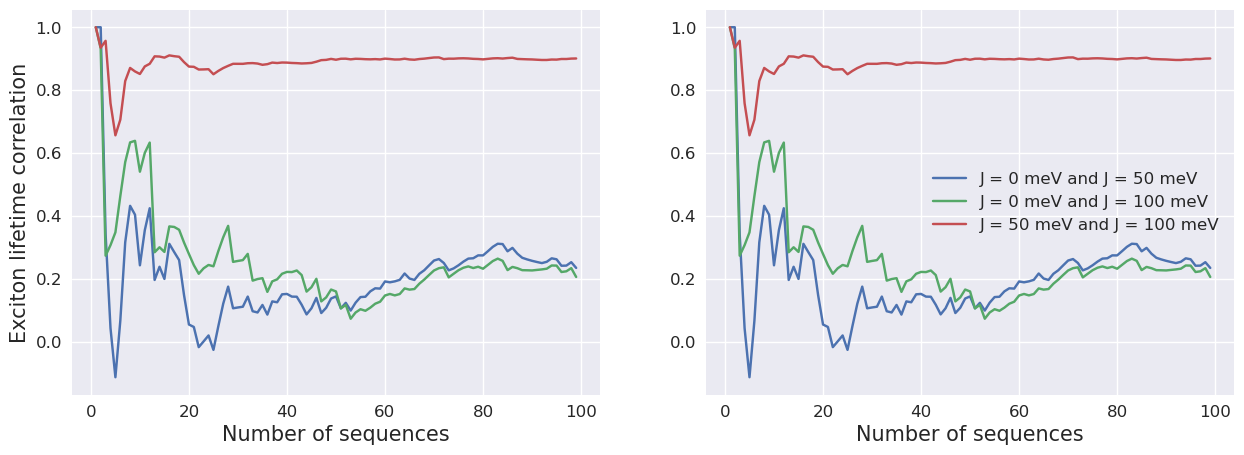

In [15]:
from tools import get_sorted_dict, save_fig

directory = 'docs/data/'
dominant_filename = 'lifetime_7bp_J0'

num_sequences = 101

fig, ax = plt.subplots(1,2, figsize=(15,5))
for J1, J2 in [[0,0.5],[0,1],[0.5,1]]:
    filename1, filename2 = f'lifetime_7bp_J{J1}', f'lifetime_7bp_J{J2}'
    A = get_sorted_dict(dominant_filename, filename1, directory)
    B = get_sorted_dict(dominant_filename, filename2, directory)
    corr_list=[]
    for x in range(1,num_sequences):
        corr_list.append( np.corrcoef(list(B.values())[:x],list(A.values())[:x])[0, 1] )
    ax[0].plot(corr_list[:num_sequences])
    ax[1].plot(corr_list[:num_sequences])

ax[1].legend(['J = 0 meV and J = 50 meV','J = 0 meV and J = 100 meV','J = 50 meV and J = 100 meV'],fontsize=12)
ax[0].set_ylabel('Exciton lifetime correlation')
ax[0].set_xlabel('Number of sequences')
ax[1].set_xlabel('Number of sequences')

if save:
    save_fig(fig, 'Fig_7', SAVE_DIR, format='pdf')

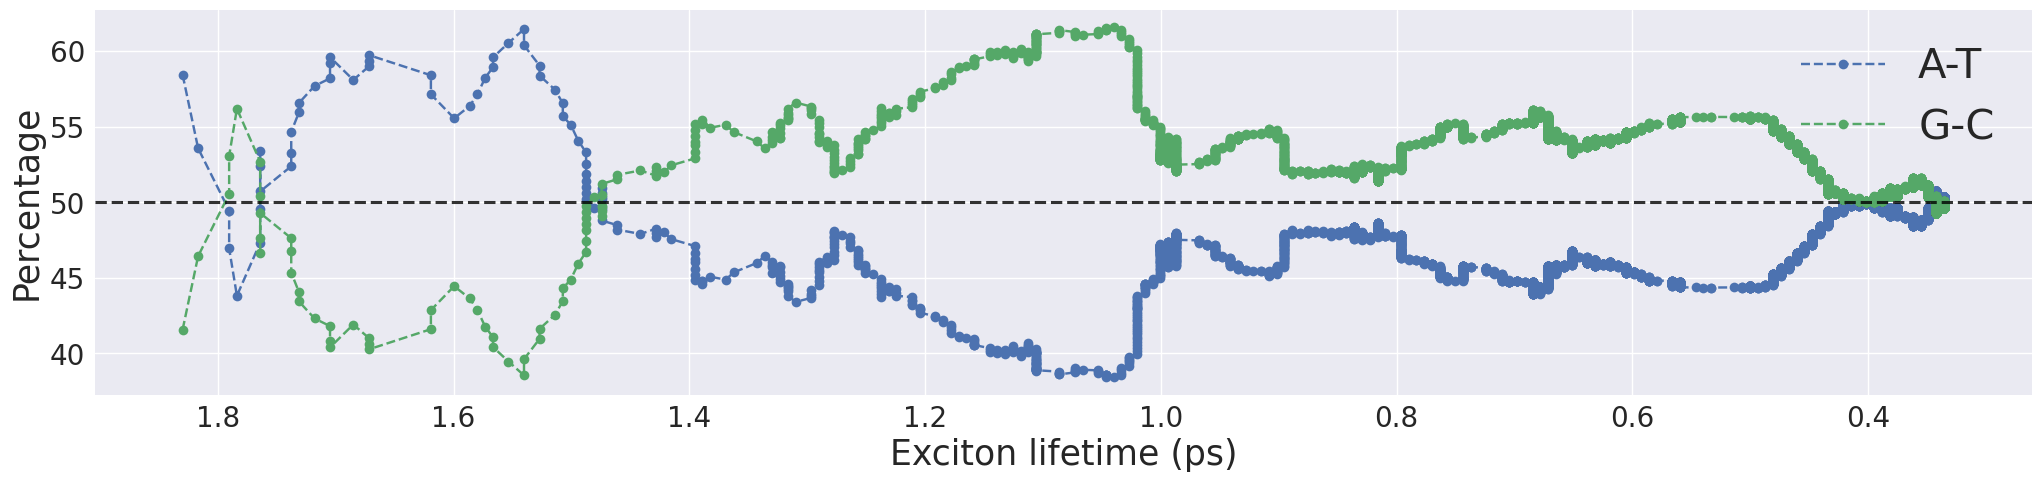

In [17]:
from tools import save_fig, my_load
from qDNA import plot_dna_base_frequency

# dipole_dict = my_load('dipole_7bp_J0', directory = 'docs/data/')
lifetime_dict = my_load('lifetime_7bp_J0.5', directory = 'docs/data/')

# plotting
plot_dna_base_frequency(lifetime_dict)

if save:
    save_fig(fig, 'Fig_8a', SAVE_DIR, format='pdf')

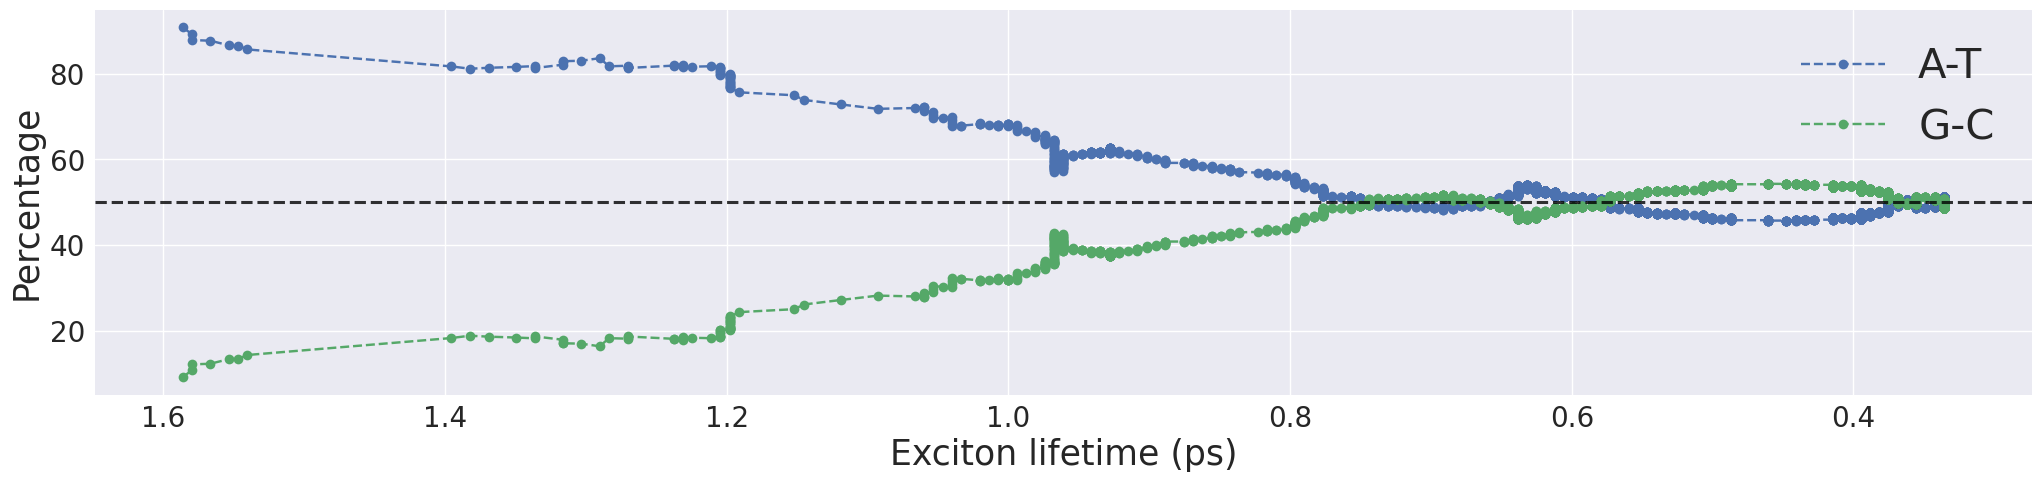

In [18]:
from tools import save_fig, my_load
from qDNA import plot_dna_base_frequency

# dipole_dict = my_load('dipole_7bp_J0', directory = 'docs/data/')
lifetime_dict = my_load('lifetime_7bp_J1', directory = 'docs/data/')
plot_dna_base_frequency(lifetime_dict)

if save:
    save_fig(fig, 'Fig_8b', SAVE_DIR, format='pdf')

# Supplementary

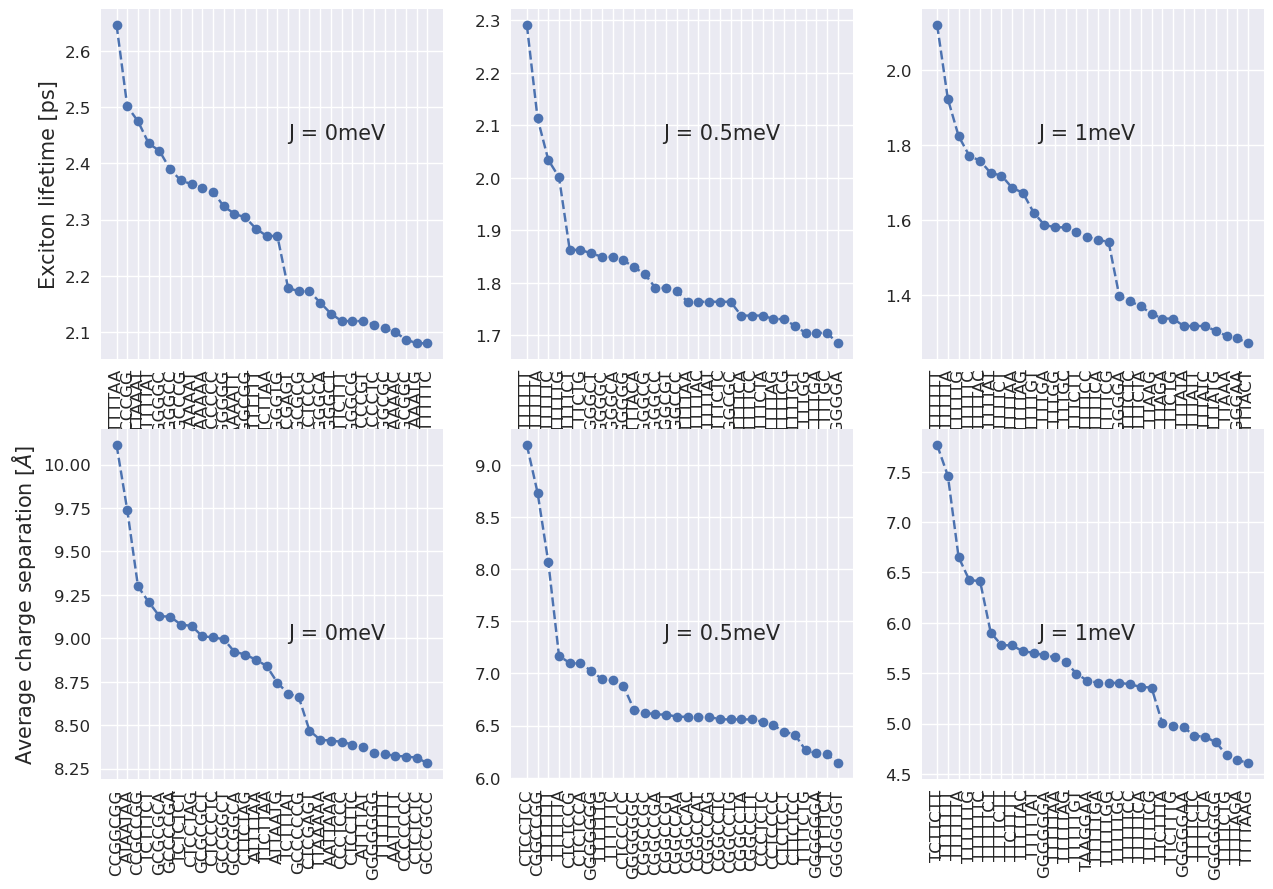

In [19]:
from tools import my_load, save_fig
import numpy as np

top_num = 30

fig, ax = plt.subplots(2, 3, figsize= (15,10) )

for i, J in enumerate([0,0.5,1]):
    dipole_dict = my_load(f'dipole_7bp_J{J}', directory = 'docs/data/')
    lifetime_dict = my_load(f'lifetime_7bp_J{J}', directory = 'docs/data/') 
    dna_seqs_lifetime = list(lifetime_dict.keys())[:top_num]
    lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000
    dna_seqs_dipole = list(dipole_dict.keys())[:top_num]
    dipoles = list(dipole_dict.values())[:top_num]

    ax[0,i].plot(dna_seqs_lifetime, lifetimes, 'o--')
    ax[0,i].set_xticks(dna_seqs_lifetime)
    ax[0,i].set_xticklabels(labels = dna_seqs_lifetime, rotation=90)
    ax[1,i].plot(dna_seqs_dipole, dipoles, 'o--')
    ax[1,i].set_xticks(dna_seqs_dipole)
    ax[1,i].set_xticklabels(labels = dna_seqs_dipole, rotation=90)
    fig.text(0.25*(i+1),0.75, f'J = {J}meV', fontsize=15)
    fig.text(0.25*(i+1),0.25, f'J = {J}meV', fontsize=15)

ax[0,0].set_ylabel(r'Exciton lifetime [ps]')
ax[1,0].set_ylabel(r'Average charge separation [$\AA$]')

if save:
    save_fig(fig, 'Fig_S1', SAVE_DIR, format='pdf')

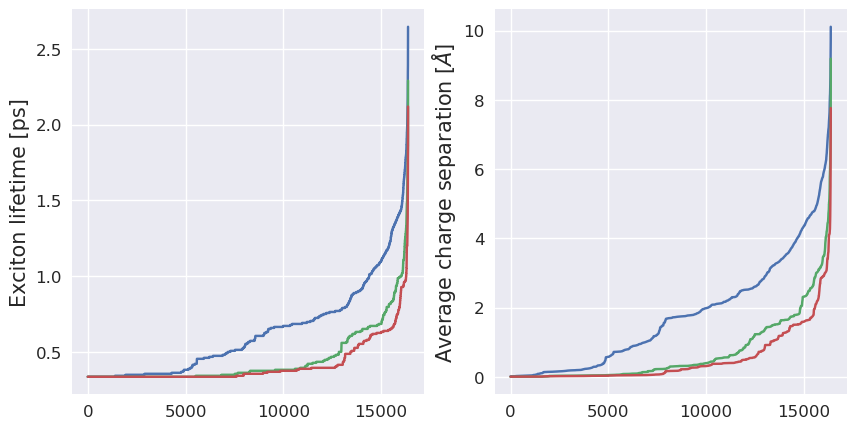

In [20]:
from tools import my_load, save_fig
import numpy as np

fig, ax = plt.subplots(1, 2, figsize= (10,5) )

for J in [0,0.5,1]:
    dipole_dict = my_load(f'dipole_7bp_J{J}', directory = 'docs/data/')
    lifetime_dict = my_load(f'lifetime_7bp_J{J}', directory = 'docs/data/') 
    ax[0].plot( np.array( list(lifetime_dict.values())[::-1] )/1000 )
    ax[1].plot( list(dipole_dict.values())[::-1] )

ax[0].set_ylabel(r'Exciton lifetime [ps]')
ax[1].set_ylabel(r'Average charge separation [$\AA$]') 

if save:
    save_fig(fig, 'Fig_S2', SAVE_DIR, format='pdf')

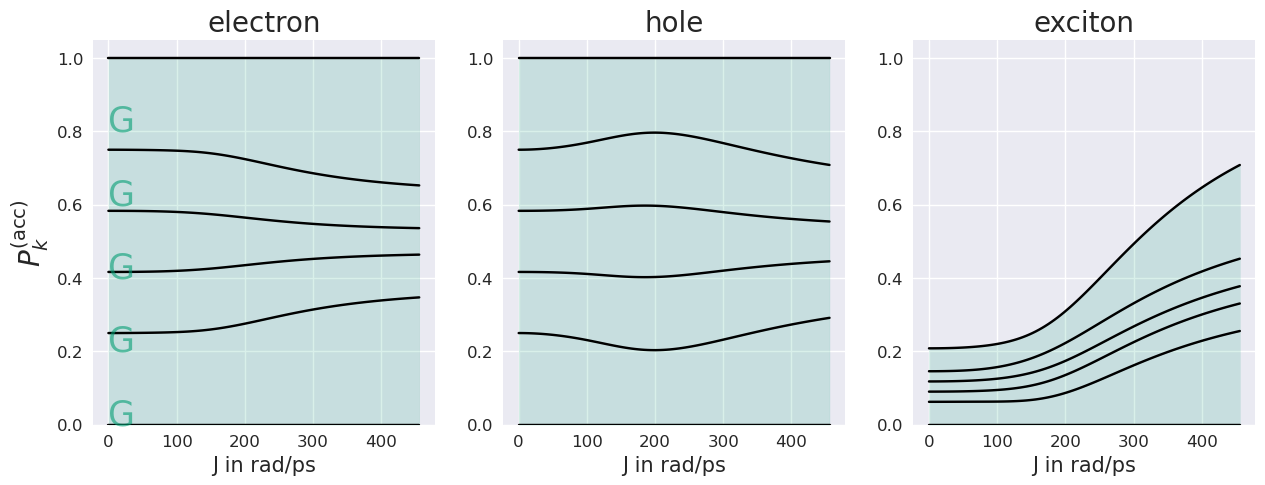

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from tools import save_fig
from qDNA import DNA_Seq, TB_Ham, plot_average_pop

# parameters
kwargs = dict(source = 'Simserides2014')
upper_strand, tb_model_name= 'GGGGG', 'WM'
J_list, J_unit = np.linspace(0, 300, 100), 'meV'

dna_seq = DNA_Seq(upper_strand, tb_model_name)
tb_ham = TB_Ham(dna_seq, **kwargs)

# plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_average_pop(ax, tb_ham, J_list, J_unit)

if save:
    save_fig(fig, 'Fig_S3a', SAVE_DIR, format='pdf')

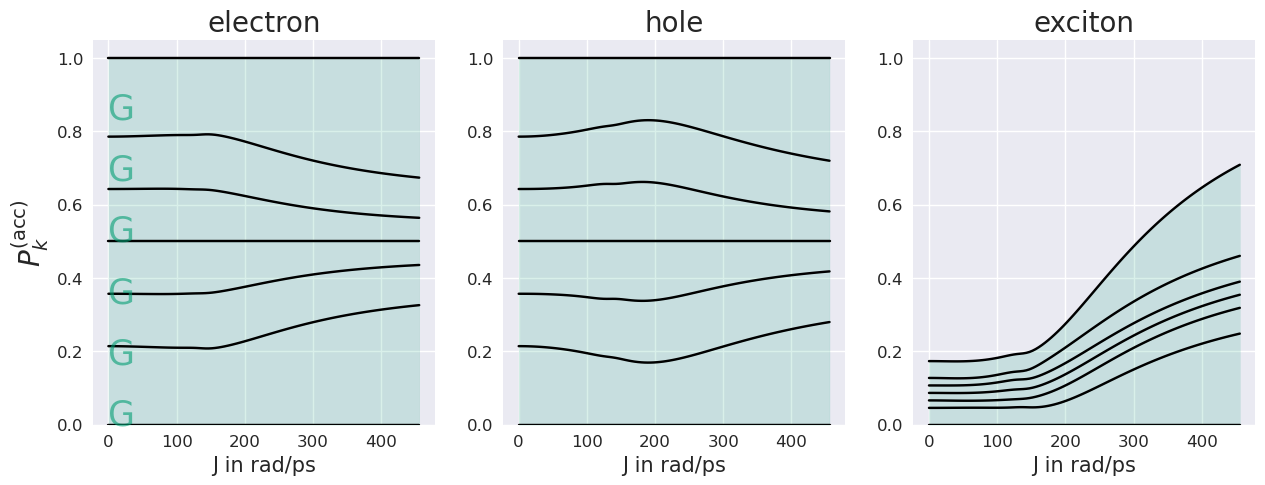

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from tools import save_fig
from qDNA import DNA_Seq, TB_Ham, plot_average_pop

# parameters
kwargs = dict(source = 'Simserides2014')
upper_strand, tb_model_name= 'GGGGGG', 'WM'
J_list, J_unit = np.linspace(0, 300, 100), 'meV'

dna_seq = DNA_Seq(upper_strand, tb_model_name)
tb_ham = TB_Ham(dna_seq, **kwargs)

# plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_average_pop(ax, tb_ham, J_list, J_unit)

if save:
    save_fig(fig, 'Fig_S3b', SAVE_DIR, format='pdf')

C:\Users\Dennis Herb\anaconda3\envs\qDNA\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Dennis Herb\anaconda3\envs\qDNA\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Dennis Herb\anaconda3\envs\qDNA\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


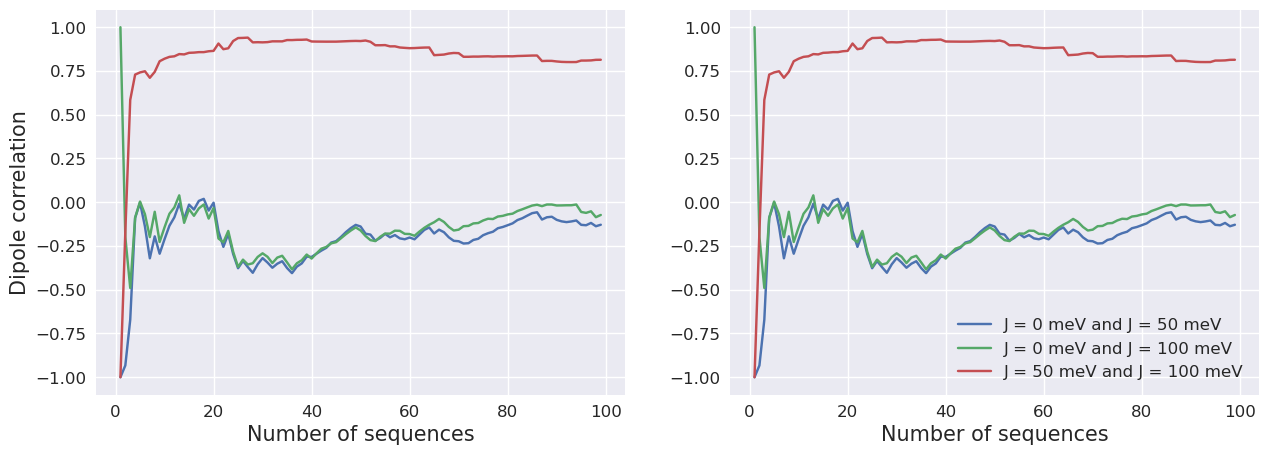

In [19]:
import numpy as np
from tools import get_sorted_dict, save_fig

directory = 'docs/data/'
dominant_filename = 'dipole_7bp_J0'

num_sequences = 101

fig, ax = plt.subplots(1,2, figsize=(15,5))
for J1, J2 in [[0,0.5],[0,1],[0.5,1]]:
    filename1, filename2 = f'dipole_7bp_J{J1}', f'dipole_7bp_J{J2}'
    A = get_sorted_dict(dominant_filename, filename1, directory)
    B = get_sorted_dict(dominant_filename, filename2, directory)
    corr_list=[]
    for x in range(1,num_sequences):
        corr_list.append( np.corrcoef(list(B.values())[:x],list(A.values())[:x])[0, 1] )
    ax[0].plot(corr_list[:num_sequences])
    ax[1].plot(corr_list[:num_sequences])

ax[1].legend(['J = 0 meV and J = 50 meV','J = 0 meV and J = 100 meV','J = 50 meV and J = 100 meV'],fontsize=12)
ax[0].set_ylabel('Dipole correlation')
ax[0].set_xlabel('Number of sequences')
ax[1].set_xlabel('Number of sequences')

if save:
    save_fig(fig, 'Fig_S4', SAVE_DIR, format='pdf')

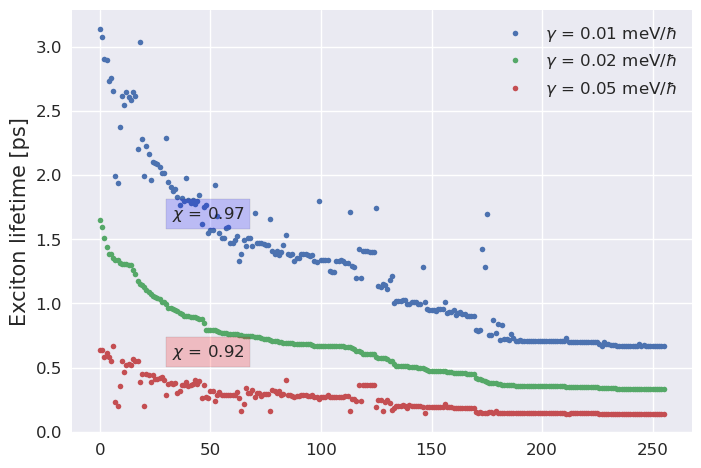

In [23]:
from tools import get_sorted_dict, get_correlation, save_fig

directory = 'docs/data/'
dominant_filename = 'lifetime_7bp_relax0.02'

fig, ax = plt.subplots()
for relax_rate in [0.01, 0.02, 0.05]:
    filename = f'lifetime_7bp_relax{relax_rate}'
    lifetime_dict = get_sorted_dict(dominant_filename, filename, directory)
    ax.plot( np.array( list(lifetime_dict.values()) )/1000, '.', markersize=8, label=f'$\gamma$ = {relax_rate} meV/$\hbar$')

ax.set_ylabel(r'Exciton lifetime [ps]')
ax.legend()

chi_1 = np.round( get_correlation(dominant_filename, 'lifetime_7bp_relax0.01', directory), 2)
chi_2 = np.round( get_correlation(dominant_filename, 'lifetime_7bp_relax0.05', directory), 2)
fig.text(0.25, 0.5, f'$\chi$ = {chi_1}',fontsize=12, bbox=dict(facecolor='blue', alpha=0.2))
fig.text(0.25, 0.25, f'$\chi$ = {chi_2}',fontsize=12, bbox=dict(facecolor='red', alpha=0.2))

if save:
    save_fig(fig, 'Fig_S5', SAVE_DIR, format='pdf')